In [0]:
!pip install tensorflow==1.14.0

In [0]:
from google.colab import drive
import sys,os
from pathlib import Path

drive.mount('/gdrive')
%cd /gdrive/My\ Drive/tesis_Elizabeth
# Get the current working directory
tesis_f = !pwd
tesis_f = Path(str(tesis_f[0]))
this_f = str(tesis_f / "Michael" / "Desarrollo")
# Add the parent folder of this file to the python path 
# in order to export the modules inside it.
sys.path.append(this_f)

import Language_Analysis

In [0]:
#Load the test results
dev_data_english = Language_Analysis.load_pickle("./data/depparse/dev_attn.pkl")
dev_data_spanish = Language_Analysis.load_pickle("./data/depparse_es/dev_attn.pkl")
dev_data_italian = Language_Analysis.load_pickle("./data/depparse_it/dev_attn.pkl")
dev_data_german = Language_Analysis.load_pickle("./data/depparse_de/dev_attn.pkl")
dev_data_dict = {"English":dev_data_english,"Spanish":dev_data_spanish,
                 "Italian":dev_data_italian, "German":dev_data_german}

In [0]:
#Save the best score for each relation in a individual csv
for lan in dev_data_dict:
  Language_Analysis.save_best_relns(dev_data_dict[lan], this_f+"/relns_"+lan+".csv")

NameError: ignored

In [0]:
for lan in dev_data_dict:
  Language_Analysis.save_all_relns(dev_data_dict[lan], this_f+"/relns_all_"+lan+".csv")

In [0]:
import numpy as np
from scipy.spatial import distance
v1 = np.ones((12,12))
print(type(v1))
sum(v1.reshape((144,)))
#v1 = np.ones(12)
#v2 = np.ones(12)
#distance.cosine(v1,v2)

<class 'numpy.ndarray'>


144.0

In [0]:
Language_Analysis.save_cosine_distances(dev_data_dict,this_f+"/cosine_distances_sp_de_it_en.csv")

NameError: ignored

In [0]:
#For individual update
lan = "English"
Language_Analysis.save_best_relns(dev_data_dict[lan], this_f+"/relns_"+lan+".csv")
Language_Analysis.save_all_relns(dev_data_dict[lan], this_f+"/relns_all_"+lan+".csv")

In [0]:
# The data consists of a list of examples (dicts)
# with the following keys/values
# {
#    "words": list of words in the sentence
#    "heads": index of each word"s syntactic head (0 for ROOT, 1 for the first 
#             word of the sentence, etc.)
#    "relns": the relation between each word and its head
#    "attns": [n_layers, n_heads, seq_len, seq_len] tensor of attention maps
#             from BERT
#    "tokens": "words" after passing throught the tokenizer
#}
print("words:", dev_data_english[0]["words"])
print("heads:", dev_data_english[0]["heads"])
print("relns:", dev_data_english[0]["relns"])
print("tokens:", dev_data_english[0]["tokens"])
# Attention maps are 9x9 because [CLS] and [SEP] are added
print("attns: a tensor with shape", dev_data_english[0]["attns"].shape)
print(dev_data_english[0]["words"][dev_data_english[0]["heads"].index(0)])
dev_data_english[0]["relns"][dev_data_english[0]["heads"].index(0)]

In [0]:
print("English")
Language_Analysis.show_best_relns(dev_data_english)

all      |     0 | attn: 32.6 | offset= 1: 30.3 | 3-9 dep->head
case     |  2499 | attn: 50.7 | offset= 2: 36.2 | 7-10 dep->head
det      |  2047 | attn: 64.7 | offset= 1: 56.7 | 3-9 dep->head
nsubj    |  1393 | attn: 44.8 | offset= 1: 39.0 | 5-9 dep->head
amod     |  1336 | attn: 78.3 | offset= 1: 78.3 | 2-9 dep->head
obl      |  1237 | attn: 21.2 | offset=-3: 21.9 | 5-3 dep->head
nmod     |  1076 | attn: 30.5 | offset=-3: 35.2 | 0-8 head<-dep
obj      |   876 | attn: 52.5 | offset=-2: 39.4 | 7-9 dep->head
advmod   |   852 | attn: 48.6 | offset= 1: 48.6 | 2-9 dep->head
compound |   810 | attn: 82.3 | offset= 1: 82.3 | 2-9 dep->head
conj     |   634 | attn: 31.2 | offset=-2: 27.8 | 6-0 dep->head
cc       |   574 | attn: 43.7 | offset= 1: 43.4 | 3-9 dep->head
mark     |   555 | attn: 53.7 | offset= 1: 53.7 | 2-9 dep->head
aux      |   410 | attn: 66.1 | offset= 1: 55.4 | 3-9 dep->head
nmod:pos |   365 | attn: 54.8 | offset= 1: 47.4 | 7-2 dep->head
cop      |   316 | attn: 45.9 | offset=

In [0]:
print("Spanish")
Language_Analysis.show_best_relns(dev_data_spanish)

Spanish
all      |     0 | attn: 31.3 | offset= 1: 31.3 | 6-1 head<-dep
case     |  3698 | attn: 46.3 | offset= 2: 47.5 | 2-1 dep->head
det      |  3486 | attn: 89.7 | offset= 1: 89.7 | 6-1 head<-dep
nmod     |  1803 | attn: 38.5 | offset=-2: 40.1 | 2-2 head<-dep
obl      |  1550 | attn: 20.3 | offset=-3: 32.1 | 3-6 dep->head
amod     |  1308 | attn: 60.9 | offset=-1: 60.7 | 5-7 head<-dep
nsubj    |  1189 | attn: 25.6 | offset= 1: 25.6 | 6-1 head<-dep
advmod   |   843 | attn: 39.1 | offset= 1: 39.0 | 6-1 head<-dep
obj      |   790 | attn: 44.4 | offset=-2: 53.9 | 2-2 head<-dep
conj     |   652 | attn: 18.7 | offset=-2: 22.2 | 2-2 head<-dep
cc       |   565 | attn: 41.8 | offset= 1: 41.1 | 6-5 dep->head
fixed    |   379 | attn: 69.4 | offset=-1: 69.4 | 6-1 dep->head
aux      |   375 | attn: 72.0 | offset= 1: 72.0 | 6-1 head<-dep
xcomp    |   356 | attn: 27.8 | offset=-2: 32.6 | 2-2 head<-dep
appos    |   320 | attn: 50.9 | offset=-1: 50.3 | 5-2 dep->head
compound |   318 | attn: 63.2 | 

In [0]:
print("Italian")
Language_Analysis.show_best_relns(dev_data_italian)

Italian
all      |     0 | attn: 30.4 | offset= 1: 30.4 | 6-1 head<-dep
det      |  3751 | attn: 85.3 | offset= 1: 85.3 | 6-1 head<-dep
case     |  3443 | attn: 43.5 | offset= 2: 56.0 | 1-11 head<-dep
nmod     |  1876 | attn: 29.4 | offset=-3: 42.1 | 5-3 dep->head
obl      |  1591 | attn: 16.5 | offset=-3: 27.0 | 2-2 head<-dep
amod     |  1395 | attn: 59.6 | offset=-1: 59.6 | 6-1 dep->head
nsubj    |  1126 | attn: 24.8 | offset= 1: 24.7 | 2-8 dep->head
obj      |   849 | attn: 43.2 | offset=-2: 51.9 | 2-2 head<-dep
advmod   |   777 | attn: 39.8 | offset= 1: 39.8 | 6-1 head<-dep
conj     |   662 | attn: 16.2 | offset=-2: 19.2 | 2-2 head<-dep
cc       |   589 | attn: 35.7 | offset= 1: 35.7 | 6-1 head<-dep
mark     |   506 | attn: 49.8 | offset= 1: 49.8 | 6-1 head<-dep
flat     |   481 | attn: 75.1 | offset=-1: 75.1 | 5-7 head<-dep
aux      |   462 | attn: 75.1 | offset= 1: 74.7 | 5-7 dep->head
cop      |   298 | attn: 38.3 | offset= 2: 39.9 | 7-11 head<-dep
advcl    |   250 | attn: 8.8 |

In [0]:
print("German")
Language_Analysis.show_best_relns(dev_data_german)

German
all      |     0 | attn: 28.2 | offset= 1: 28.2 | 2-8 dep->head
det      |  2736 | attn: 69.5 | offset= 1: 69.5 | 2-8 dep->head
case     |  2053 | attn: 38.5 | offset= 2: 46.4 | 7-2 head<-dep
nsubj    |  1481 | attn: 23.2 | offset= 1: 23.2 | 5-7 dep->head
obl      |  1344 | attn: 26.6 | offset= 1: 26.6 | 6-1 head<-dep
advmod   |  1103 | attn: 38.9 | offset= 1: 38.9 | 5-7 dep->head
nmod     |  1101 | attn: 40.1 | offset=-2: 48.3 | 2-2 head<-dep
amod     |  1089 | attn: 87.3 | offset= 1: 87.3 | 6-1 head<-dep
obj      |   895 | attn: 15.6 | offset= 1: 15.5 | 5-2 head<-dep
conj     |   842 | attn: 22.1 | offset=-2: 25.8 | 2-2 head<-dep
cc       |   724 | attn: 37.2 | offset= 1: 37.2 | 6-1 head<-dep
mark     |   459 | attn: 31.4 | offset= 1: 31.2 | 5-2 head<-dep
aux      |   365 | attn: 34.2 | offset=-1: 34.0 | 0-4 head<-dep
cop      |   274 | attn: 24.1 | offset=-1: 23.7 | 6-1 dep->head
nmod:pos |   271 | attn: 68.3 | offset= 1: 68.3 | 6-1 head<-dep
acl:relc |   271 | attn: 10.3 | o

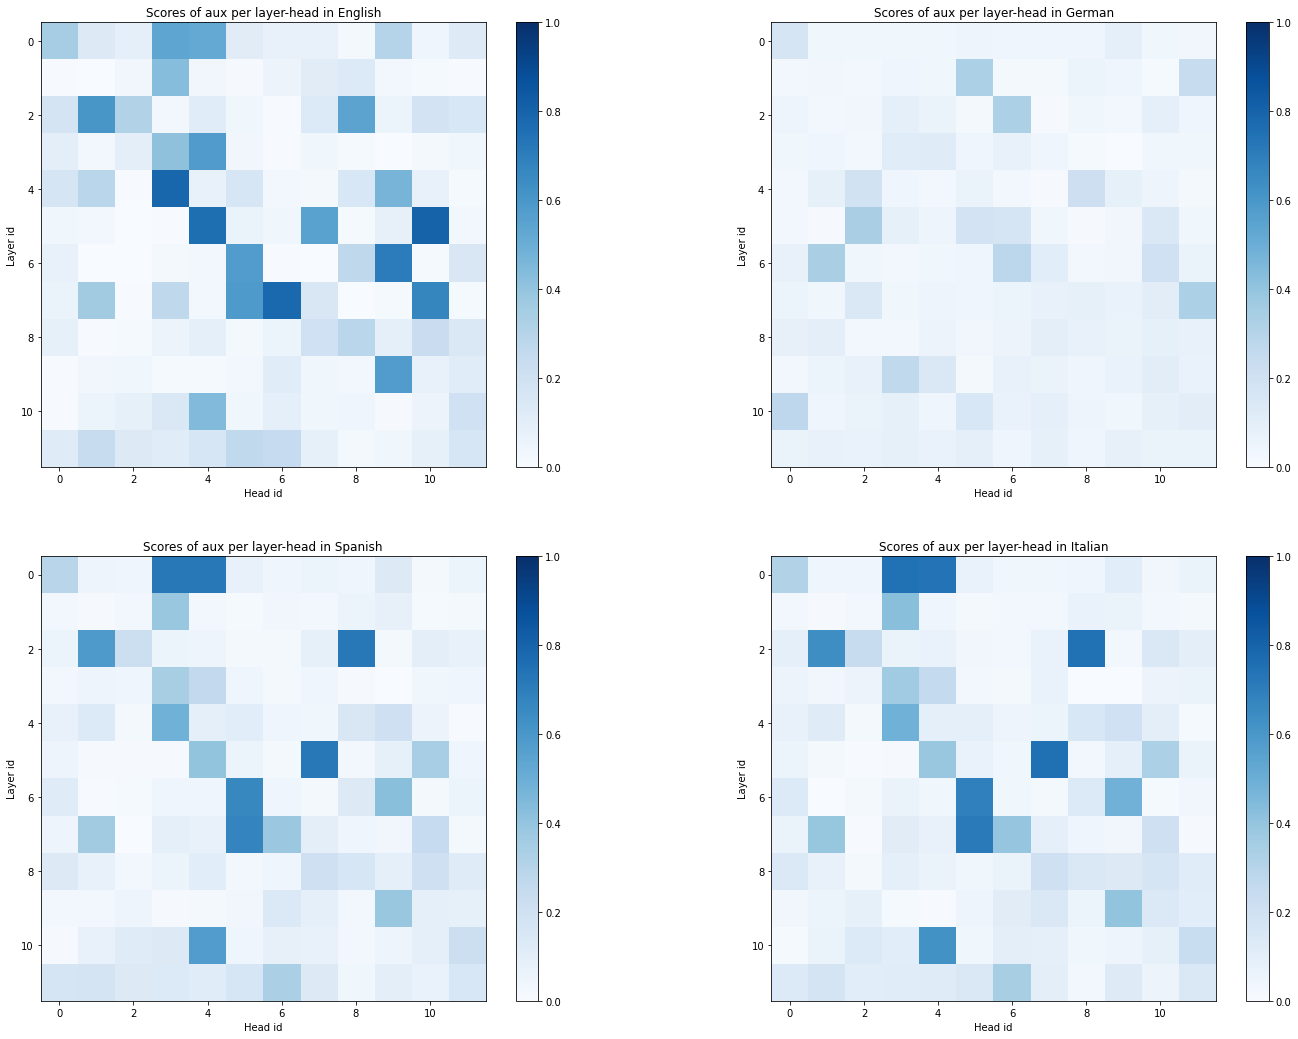

In [0]:
Language_Analysis.plot_reln_score("aux",dev_data_dict)

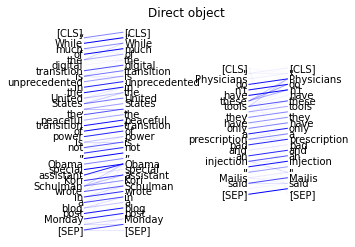

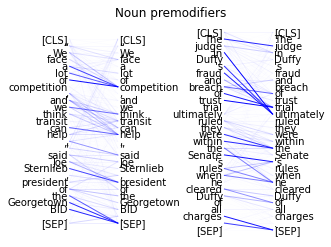

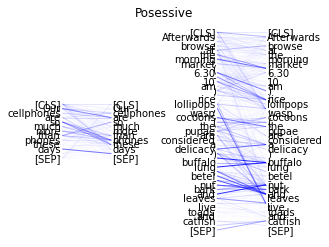

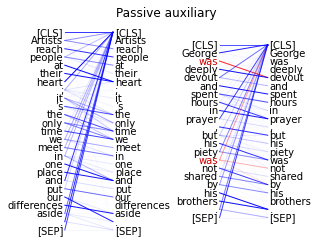

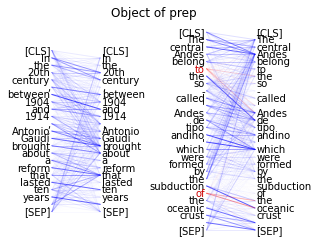

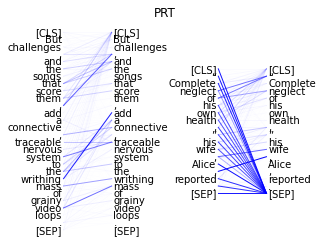

In [0]:
Language_Analysis.plot_attn("Direct object", [dev_data[0], dev_data[100]], 6, 11, 
          ["funds", "plans", "line"], example_sep=4)
Language_Analysis.plot_attn("Noun premodifiers", [dev_data[13], dev_data[110]], 7, 10, 
          ["language", "law", "fight", "time", "executive"], color_from=False)
Language_Analysis.plot_attn("Posessive", [dev_data[111], dev_data[244]], 6, 5,
          ["his", "'s", "its"])
Language_Analysis.plot_attn("Passive auxiliary", [dev_data[192], dev_data[680]], 3, 9,
         ["been", "was"])
Language_Analysis.plot_attn("Object of prep", [dev_data[i] for i in [975, 979]], 8, 5,
          ["in", "with", "to", "of", "at"], hide_sep=True)
Language_Analysis.plot_attn("PRT", [dev_data[152], dev_data[160]], 5, 6,
          ["out", "around"])

In [0]:
from scipy.spatial import distance
distance.cosine([1, 0, 0], [0, 1, 0])

1.0